In [2]:
# https://cosmiccoding.com.au/tutorials/ab_tests

import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.proportion as prop
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import math
import statistics



# Frequentist A/B Test Calculator (z-test)

Calculate if the 2 sample distributions are statistically different enough to determine one performs better than the other.

### Input total impressions and conversions for each variant

### Output conversion rate and probability functions

Control conversion rate:  0.0167
Treatment conversion rate:  0.0206


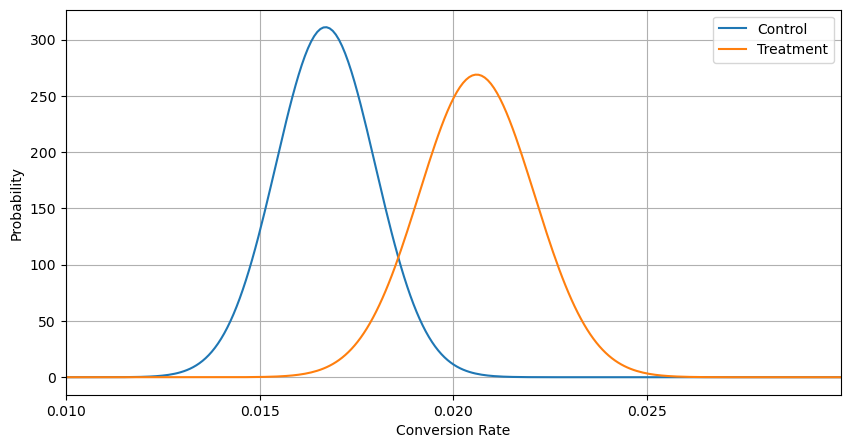

In [28]:
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(10,5))

#Update sample_a, sample_b with sample sizes from variant
#Update conv_a, conv_b with conversions from variants

sample_a, sample_b = 9985, 9168
conv_a, conv_b = 167, 189
rate_a, rate_b = np.round(conv_a/sample_a,4), np.round(conv_b/sample_b,4)
print("Control conversion rate: ", rate_a)
print("Treatment conversion rate: ",rate_b)

#given data we collected, the probability that the TRUE conversion rate for A and B was a certain value
std_a = np.sqrt(rate_a * (1-rate_a) / sample_a)
std_b = np.sqrt(rate_b * (1-rate_b) / sample_b)

conv_rate = np.linspace(0,.2, 2500)
prob_a = norm(rate_a, std_a).pdf(conv_rate)
prob_b = norm(rate_b, std_b).pdf(conv_rate)

plt.plot(conv_rate, prob_a, label = "Control")
plt.plot(conv_rate, prob_b, label = "Treatment")
plt.xticks(np.arange(0.0,.03,step=.005))
plt.xlim(0.01,.03)
plt.legend()
plt.grid()
plt.xlabel("Conversion Rate"); plt.ylabel("Probability");

### Output z-score
Z-Score: standard deviations of sample from the population mean.
A two-tailed test at the 5% level has a critical boundary Z score of +1.96 and -1.96
A one-tailed test at the 5% level has a critical boundary Z score of +1.64 or -1.64.
Outside of these bounds, a test will be considered statistically significant.

### Output p-value for 1-tail test and 2-tail test
At a 5% level, if p-value is <0.05, then a test will be considered statistically significant.

1-tail only considers one side of the distribution. 2-tail considers that the samples could differ from either side.

In [29]:
z_score = (rate_b - rate_a)/np.sqrt(std_a**2 + std_b**2)
print("z-score is:")
print("{0:0.3f}".format(z_score))

#is treatment better than control?
print('p-value for 1-tail test is:')
print('{0:0.3f}'.format(norm().sf(z_score)))

#is treatment different from control?
print('p-value for 2-tail test is:')
print('{0:0.3f}'.format(norm().sf(z_score)*2))

z-score is:
1.989
p-value for 1-tail test is:
0.023
p-value for 2-tail test is:
0.047


In [8]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
successes = [conv_a, conv_b]
nobs = [sample_a, sample_b]

z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_a, lower_b), (upper_a, upper_b) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'ci 95% for control group: [{lower_a:.4f}, {upper_a:.4f}]')
print(f'ci 95% for treatment group: [{lower_b:.4f}, {upper_b:.4f}]')

z statistic: -1.99
p-value: 0.046
ci 95% for control group: [0.0142, 0.0192]
ci 95% for treatment group: [0.0177, 0.0235]


## Visualize probability that treatment is better than control
Look at the Area under the curve

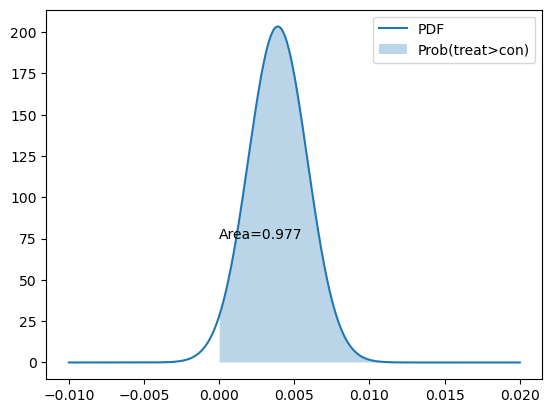

In [32]:
#plot
p = norm(rate_b - rate_a, np.sqrt(std_a**2 + std_b**2))
x = np.linspace(-.01,0.02,1000)
y = p.pdf(x)
#get 1 - p-value for 1-tail test, probability treatment is better than control
area_under_curve = p.sf(0)
plt.plot(x,y, label="PDF")
plt.fill_between(x, 0, y, where=x>0, label="Prob(treat>con)", alpha = 0.3)
plt.annotate(f"Area={area_under_curve:0.3f}",(0,75))
plt.legend()


# Condensed code for p-value of 1-tail test

In [14]:
#condensed code
#norm.cdf will return confidence value
#norm.sf will return p-value for 1 tail test

def get_confidence_ab_test(conv_a, sample_a, conv_b, sample_b):
    rate_a = conv_a / sample_a
    rate_b = conv_b / sample_b
    std_a = np.sqrt(rate_a * (1 - rate_a) / sample_a)
    std_b = np.sqrt(rate_b * (1 - rate_b) / sample_b)
    z_score = (rate_b - rate_a) / np.sqrt(std_a**2 + std_b**2)
    return np.round(norm.sf(z_score),4)

print(get_confidence_ab_test(conv_a, sample_a, conv_b, sample_b))

0.0237


In [15]:
#simulation check
n = 10000
rates_a = norm(rate_a, std_a).rvs(n)
rates_b = norm(rate_b, std_b).rvs(n)
b_better = (rates_b > rates_a).mean()
print(f"B is better than A {b_better:0.1%} of the time in the simulation data")

B is better than A 97.3% of the time in the simulation data


# Visual Explanation for Frequentist Distributions

Control conversion rate:  0.2
Treatment conversion rate:  0.1636


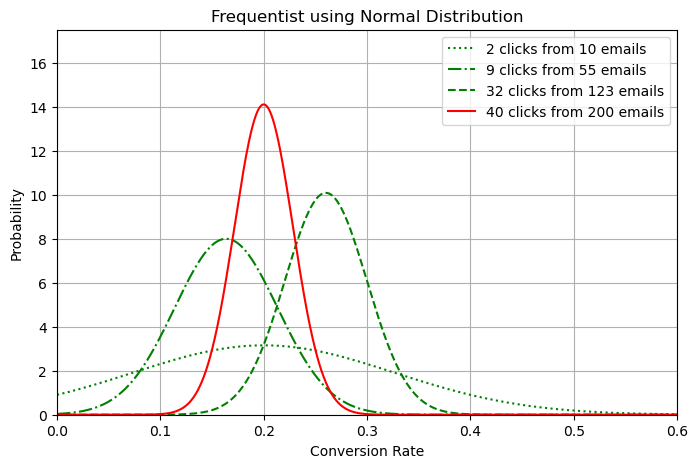

In [18]:
#visualization


from scipy.stats import norm
sample_a, sample_b, sample_c, sample_d = 10,55,123,200
conv_a, conv_b,conv_c,conv_d = 2,9,32,40
rate_a, rate_b, rate_c, rate_d = conv_a/sample_a, conv_b/sample_b,conv_c/sample_c,conv_d/sample_d
print("Control conversion rate: ", np.round(rate_a,4))
print("Treatment conversion rate: ", np.round(rate_b,4))

#given data we collected, the probability that the TRUE conversion rate for A and B was a certain value
std_a = np.sqrt(rate_a * (1-rate_a) / sample_a)
std_b = np.sqrt(rate_b * (1-rate_b) / sample_b)
std_c = np.sqrt(rate_c * (1-rate_c) / sample_c)
std_d = np.sqrt(rate_d * (1-rate_d) / sample_d)

conv_rate = np.linspace(0,1, 2000)
prob_a = norm(rate_a, std_a).pdf(conv_rate)
prob_b = norm(rate_b, std_b).pdf(conv_rate)
prob_c = norm(rate_c, std_c).pdf(conv_rate)
prob_d = norm(rate_d, std_d).pdf(conv_rate)

plt.figure(figsize=(8,5))
plt.plot(conv_rate, prob_a, 'g:', label = "2 clicks from 10 emails")
plt.plot(conv_rate, prob_b, 'g-.', label = "9 clicks from 55 emails")
plt.plot(conv_rate, prob_c, 'g--', label = "32 clicks from 123 emails")
plt.plot(conv_rate, prob_d, 'r-', label = "40 clicks from 200 emails")
plt.xlim(0.,0.6)
plt.ylim(0,17.5)
plt.legend()
plt.grid()
plt.title("Frequentist using Normal Distribution")
plt.xlabel("Conversion Rate"); plt.ylabel("Probability");

Control conversion rate:  0.2
Treatment conversion rate:  0.16363636363636364


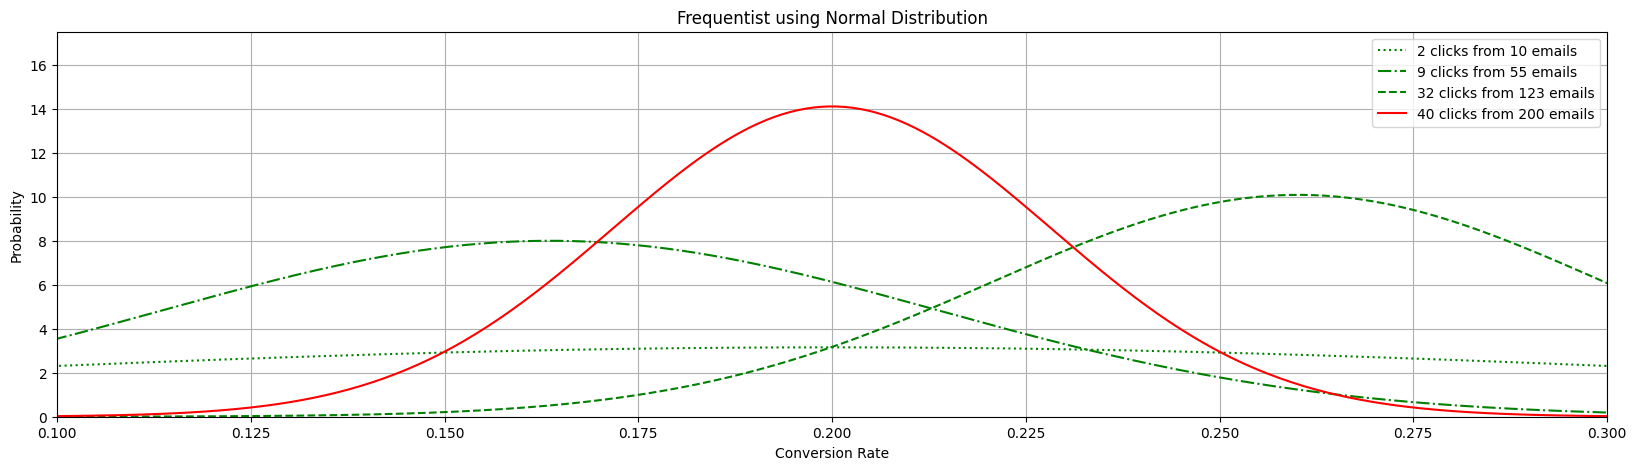

In [23]:
from scipy.stats import norm
sample_a, sample_b, sample_c, sample_d = 10,55,123,200
conv_a, conv_b,conv_c,conv_d = 2,9,32,40
rate_a, rate_b, rate_c, rate_d = conv_a/sample_a, conv_b/sample_b,conv_c/sample_c,conv_d/sample_d
print("Control conversion rate: ", rate_a)
print("Treatment conversion rate: ",rate_b)

#given data we collected, the probability that the TRUE conversion rate for A and B was a certain value
std_a = np.sqrt(rate_a * (1-rate_a) / sample_a)
std_b = np.sqrt(rate_b * (1-rate_b) / sample_b)
std_c = np.sqrt(rate_c * (1-rate_c) / sample_c)
std_d = np.sqrt(rate_d * (1-rate_d) / sample_d)

conv_rate = np.linspace(0,1, 2000)
prob_a = norm(rate_a, std_a).pdf(conv_rate)
prob_b = norm(rate_b, std_b).pdf(conv_rate)
prob_c = norm(rate_c, std_c).pdf(conv_rate)
prob_d = norm(rate_d, std_d).pdf(conv_rate)

plt.figure(figsize=(20,5))
plt.plot(conv_rate, prob_a, 'g:', label = "2 clicks from 10 emails")
plt.plot(conv_rate, prob_b, 'g-.', label = "9 clicks from 55 emails")
plt.plot(conv_rate, prob_c, 'g--', label = "32 clicks from 123 emails")
plt.plot(conv_rate, prob_d, 'r-', label = "40 clicks from 200 emails")
plt.xlim(0.1,0.3)
plt.ylim(0,17.5)
plt.legend()
plt.grid()
plt.title("Frequentist using Normal Distribution")
plt.xlabel("Conversion Rate"); plt.ylabel("Probability");